In [1]:
# 1. What is unsupervised learning in the context of machine learning?
#    Unsupervised learning involves training a model on data without labeled responses to discover hidden patterns or structures.

# 2. How does K-Means clustering algorithm work?
#    K-Means partitions data into K clusters by initializing centroids, assigning points to the nearest centroid, and updating centroids iteratively.

# 3. Explain the concept of a dendrogram in hierarchical clustering.
#    A dendrogram is a tree-like diagram that illustrates the arrangement of clusters formed by hierarchical clustering.

# 4. What is the main difference between K-Means and Hierarchical Clustering?
#    K-Means requires the number of clusters beforehand and creates flat clusters, while Hierarchical Clustering builds a nested cluster tree.

# 5. What are the advantages of DBSCAN over K-Means?
#    DBSCAN can find clusters of arbitrary shape, automatically detect noise, and doesn’t require specifying the number of clusters in advance.

# 6. When would you use Silhouette Score in clustering?
#    Silhouette Score is used to evaluate the consistency within clusters; it measures how similar a point is to its own cluster versus others.

# 7. What are the limitations of Hierarchical Clustering?
#    It has high computational complexity, is not scalable to large datasets, and merging decisions are final (no backtracking).

# 8. Why is feature scaling important in clustering algorithms like K-Means?
#    Because K-Means relies on distance metrics, unscaled features can bias clustering results toward features with larger ranges.

# 9. How does DBSCAN identify noise points?
#    DBSCAN marks points as noise if they are not core points and do not fall within the neighborhood of any core point.

# 10. Define inertia in the context of K-Means.
#     Inertia is the sum of squared distances between data points and their respective cluster centroids; it measures compactness.

# 11. What is the elbow method in K-Means clustering?
#     It's a method to determine the optimal number of clusters by plotting inertia vs K and looking for the "elbow" point.

# 12. Describe the concept of "density" in DBSCAN.
#     Density refers to the number of points within a given radius (epsilon); a dense region is defined by a minimum number of points.

# 13. Can hierarchical clustering be used on categorical data?
#     Yes, with appropriate distance measures like Hamming distance, though it’s less straightforward than with numerical data.

# 14. What does a negative Silhouette Score indicate?
#     It suggests the data point may have been assigned to the wrong cluster, being closer to another cluster than its own.

# 15. Explain the term "linkage criteria" in hierarchical clustering.
#     Linkage criteria define how distances between clusters are calculated, e.g., single, complete, average, or Ward’s method.

# 16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
#     Because K-Means assumes clusters are spherical and equally sized, leading to poor results with irregular or varied clusters.

# 17. What are the core parameters in DBSCAN, and how do they influence clustering?
#     The core parameters are eps (radius) and min_samples (minimum points in a neighborhood); they determine cluster formation and noise detection.

# 18. How does K-Means++ improve upon standard K-Means initialization?
#     K-Means++ spreads out the initial centroids to reduce the chance of poor cluster convergence and improve final clustering.

# 19. What is agglomerative clustering?
#     A type of hierarchical clustering that starts with each point as its own cluster and merges the closest pairs iteratively.

# 20. What makes Silhouette Score a better metric than just inertia for model evaluation?
#     Unlike inertia, Silhouette Score evaluates both cohesion and separation, providing a more comprehensive measure of clustering quality.


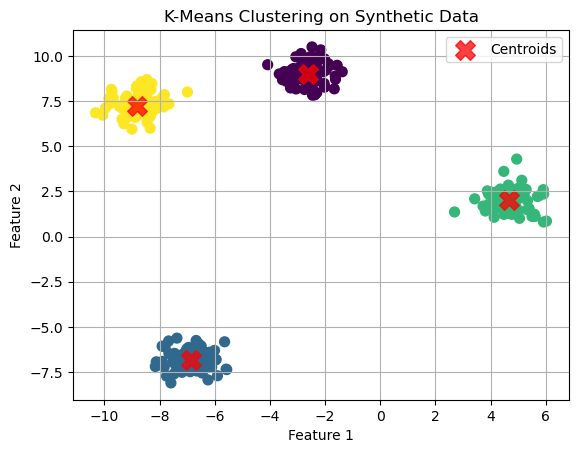

In [2]:
# 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data with 4 cluster centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# 22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters.
#     Display the first 10 predicted labels.

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Using all 4 features

# Apply Agglomerative Clustering with 3 clusters
agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X)

# Display the first 10 predicted labels
print("First 10 predicted cluster labels:", labels[:10])


First 10 predicted cluster labels: [1 1 1 1 1 1 1 1 1 1]


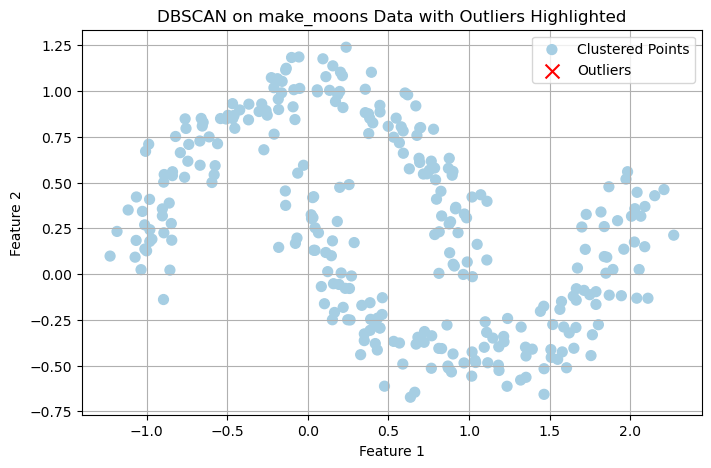

In [4]:
# 23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate synthetic moon-shaped data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify core clusters and outliers
# Outliers are labeled as -1 by DBSCAN
core_points = labels != -1
outliers = labels == -1

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[core_points][:, 0], X[core_points][:, 1], c=labels[core_points], cmap='Paired', s=50, label="Clustered Points")
plt.scatter(X[outliers][:, 0], X[outliers][:, 1], c='red', marker='x', s=100, label="Outliers")
plt.title("DBSCAN on make_moons Data with Outliers Highlighted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# 24. Load the Wine dataset and apply K-Means clustering after standardizing the features.
#     Print the size of each cluster.

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering (let’s assume we want 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Print the size of each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Size of each cluster:", cluster_sizes)


Size of each cluster: {0: 65, 1: 51, 2: 62}


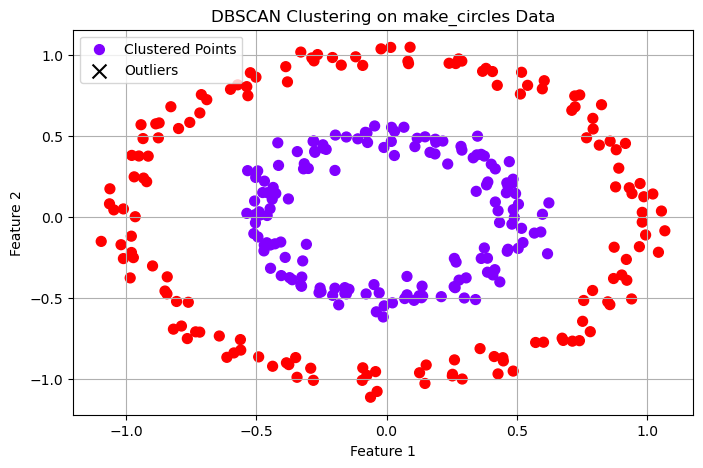

In [6]:
# 25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate synthetic circular data
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify core points and outliers
core_points = labels != -1
outliers = labels == -1

# Plot the result
plt.figure(figsize=(8, 5))
plt.scatter(X[core_points][:, 0], X[core_points][:, 1], c=labels[core_points], cmap='rainbow', s=50, label="Clustered Points")
plt.scatter(X[outliers][:, 0], X[outliers][:, 1], c='black', marker='x', s=100, label="Outliers")
plt.title("DBSCAN Clustering on make_circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# 26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters.
#     Output the cluster centroids.

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Apply MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Output the cluster centroids
centroids = kmeans.cluster_centers_

# Display centroids in a readable format using DataFrame
centroid_df = pd.DataFrame(centroids, columns=data.feature_names)
print("Cluster centroids (scaled features):\n")
print(centroid_df)


Cluster centroids (scaled features):

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fract

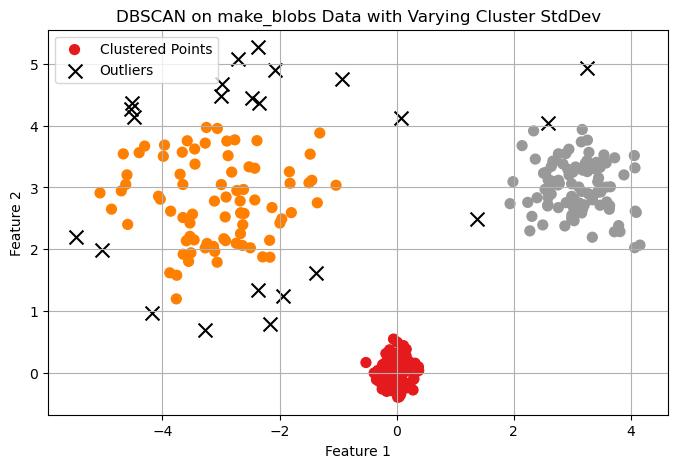

In [8]:
# 27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate synthetic data with varying cluster standard deviations
X, y = make_blobs(n_samples=300,
                  centers=[[0, 0], [3, 3], [-3, 3]],
                  cluster_std=[0.2, 0.5, 1.0],  # different standard deviations
                  random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify core points and outliers
core_points = labels != -1
outliers = labels == -1

# Plot the clusters and outliers
plt.figure(figsize=(8, 5))
plt.scatter(X[core_points][:, 0], X[core_points][:, 1], c=labels[core_points], cmap='Set1', s=50, label='Clustered Points')
plt.scatter(X[outliers][:, 0], X[outliers][:, 1], c='black', marker='x', s=100, label='Outliers')
plt.title("DBSCAN on make_blobs Data with Varying Cluster StdDev")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


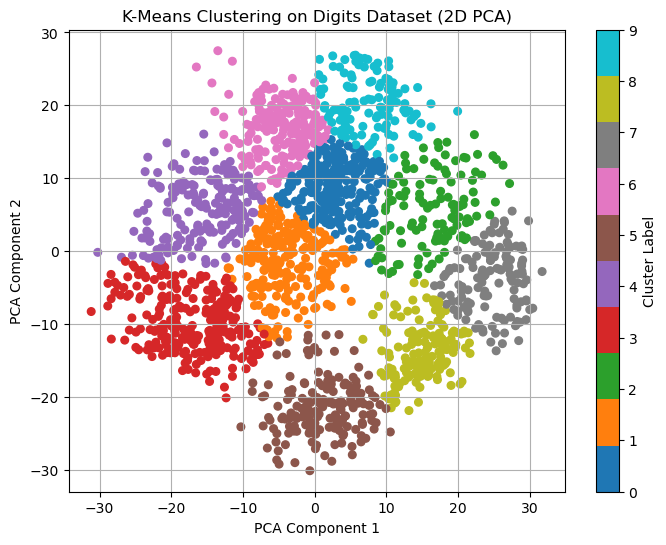

In [9]:
# 28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering (assuming 10 clusters for digits 0-9)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30)
plt.title("K-Means Clustering on Digits Dataset (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()


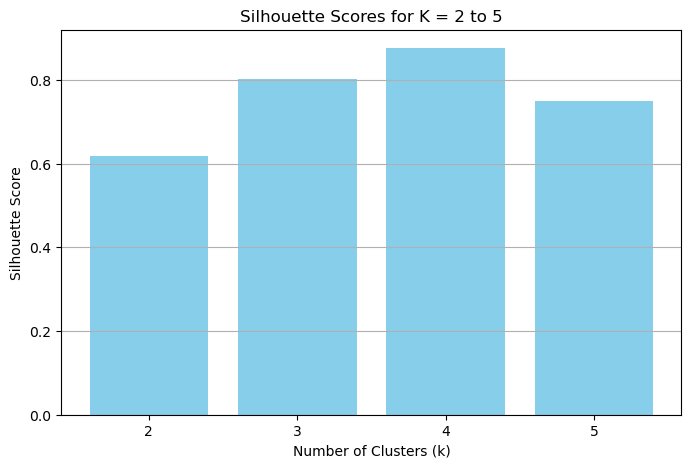

In [10]:
# 29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5.
#     Display the results as a bar chart.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Evaluate silhouette scores for k = 2 to 5
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for K = 2 to 5")
plt.xticks(k_values)
plt.grid(axis='y')
plt.show()


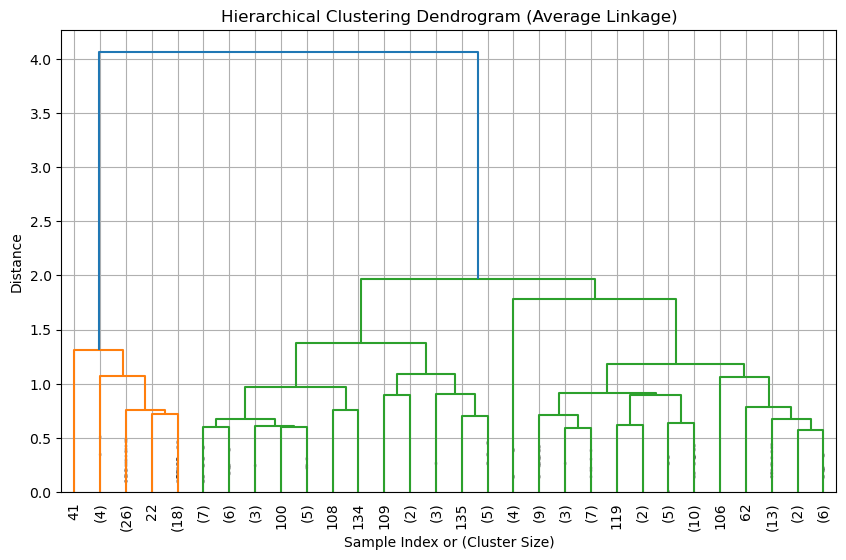

In [11]:
# 30. Load the Iris dataset and use hierarchical clustering to group data.
#     Plot a dendrogram with average linkage.

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering using average linkage
linked = linkage(X, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           truncate_mode='lastp',   # show only the last p merged clusters
           p=30,
           leaf_rotation=90.,
           leaf_font_size=10.,
           show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


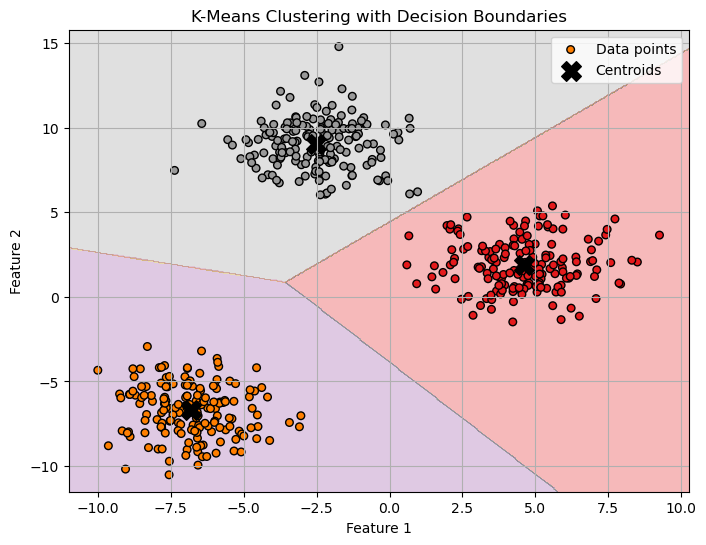

In [12]:
# 31. Generate synthetic data with overlapping clusters using make_blobs,
#     then apply K-Means and visualize with decision boundaries.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data with overlapping clusters
X, _ = make_blobs(n_samples=500,
                  centers=3,
                  cluster_std=1.5,  # Higher std means more overlap
                  random_state=42)

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
preds = kmeans.predict(grid)
preds = preds.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, alpha=0.3, cmap='Set1')
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=30, edgecolor='k', label='Data points')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering with Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


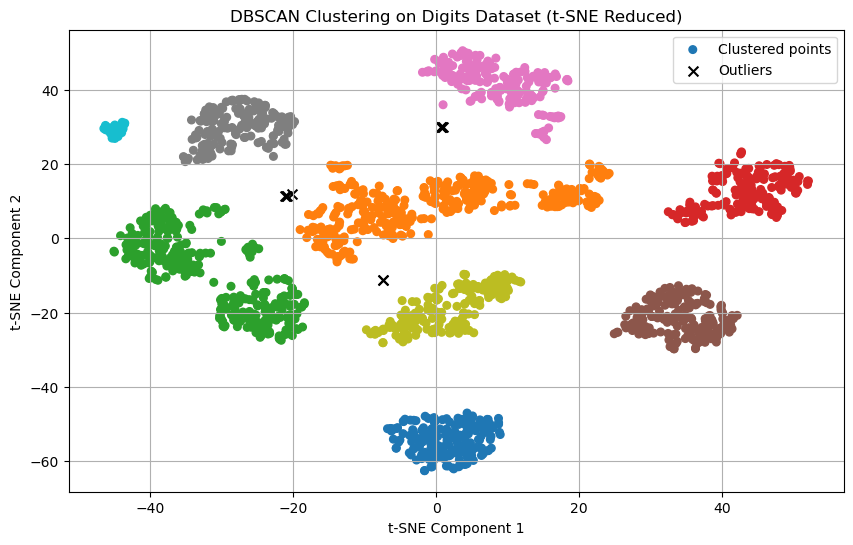

In [13]:
# 32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE.
#     Visualize the results.

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Identify core points and outliers
core_points = labels != -1
outliers = labels == -1

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[core_points, 0], X_tsne[core_points, 1],
            c=labels[core_points], cmap='tab10', s=30, label='Clustered points')
plt.scatter(X_tsne[outliers, 0], X_tsne[outliers, 1],
            c='black', marker='x', s=50, label='Outliers')
plt.title("DBSCAN Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()


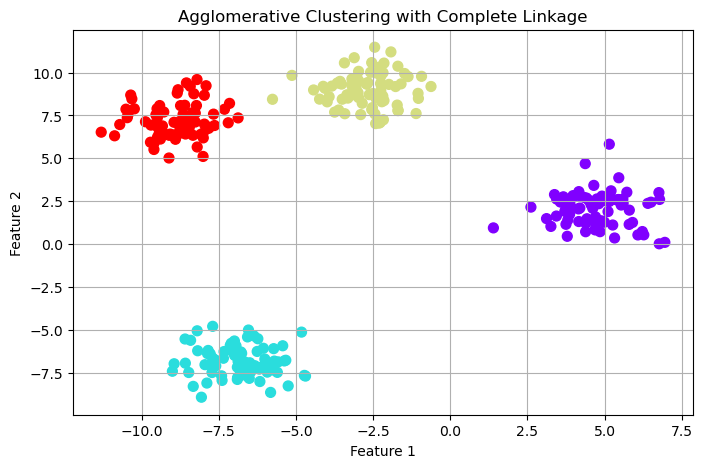

In [14]:
# 33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage.
#     Plot the result.

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300,
                  centers=4,
                  cluster_std=1.0,
                  random_state=42)

# Apply Agglomerative Clustering with complete linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agglo.fit_predict(X)

# Plot the result
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


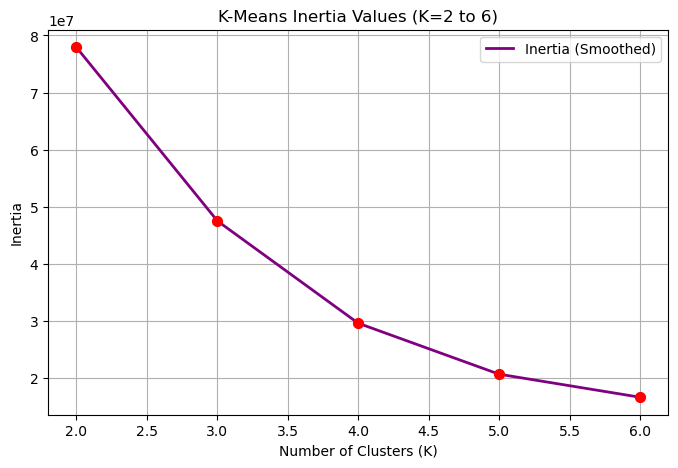

In [15]:
# 34. Load the Breast Cancer dataset and compare inertia values for K=2 to K=6 using K-Means.
#     Show the results in a sine-style plot.

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# List to store inertia values
k_values = range(2, 7)
inertias = []

# Compute inertia for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Create a "sine-style" line plot
plt.figure(figsize=(8, 5))
x_smooth = np.linspace(min(k_values), max(k_values), 500)
y_smooth = np.interp(x_smooth, k_values, inertias)

plt.plot(x_smooth, y_smooth, color='purple', linestyle='-', linewidth=2, label='Inertia (Smoothed)')
plt.scatter(k_values, inertias, color='red', s=50, zorder=5)

plt.title("K-Means Inertia Values (K=2 to 6)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.legend()
plt.show()


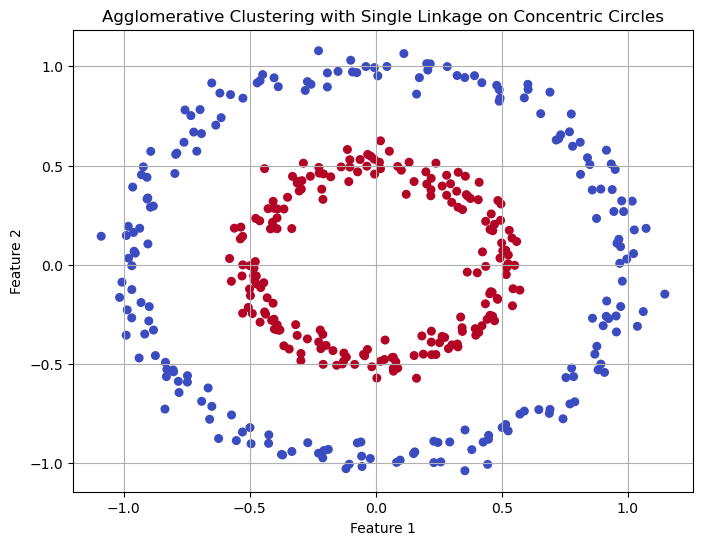

In [16]:
# 35. Generate synthetic concentric circles using make_circles and 
#     cluster using Agglomerative Clustering with single linkage.

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate concentric circle data
X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

# Apply Agglomerative Clustering with single linkage
agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=30)
plt.title("Agglomerative Clustering with Single Linkage on Concentric Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [17]:
# 36. Use the Wine dataset, apply DBSCAN after scaling the data,
#     and count the number of clusters (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
data = load_wine()
X = data.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)  # eps may be adjusted for better separation
labels = dbscan.fit_predict(X_scaled)

# Count number of clusters excluding noise (-1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Output the result
print(f"Number of clusters (excluding noise): {n_clusters}")


Number of clusters (excluding noise): 0


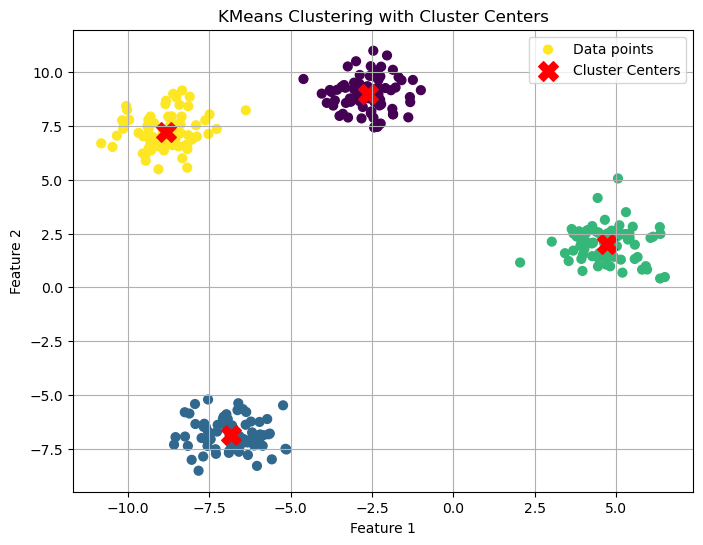

In [18]:
# 37. Generate synthetic data with make_blobs and apply KMeans.
#     Then plot the cluster centers on top of the data points.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300,
                  centers=4,
                  cluster_std=0.8,
                  random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot data points with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40, label='Data points')
# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# 38. Load the Iris dataset, cluster with DBSCAN,
#     and print how many samples were identified as noise.

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data

# Standardize the features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=4)
labels = dbscan.fit_predict(X_scaled)

# Count number of noise points (label == -1)
n_noise = np.sum(labels == -1)

# Output the result
print(f"Number of samples identified as noise: {n_noise}")


Number of samples identified as noise: 19


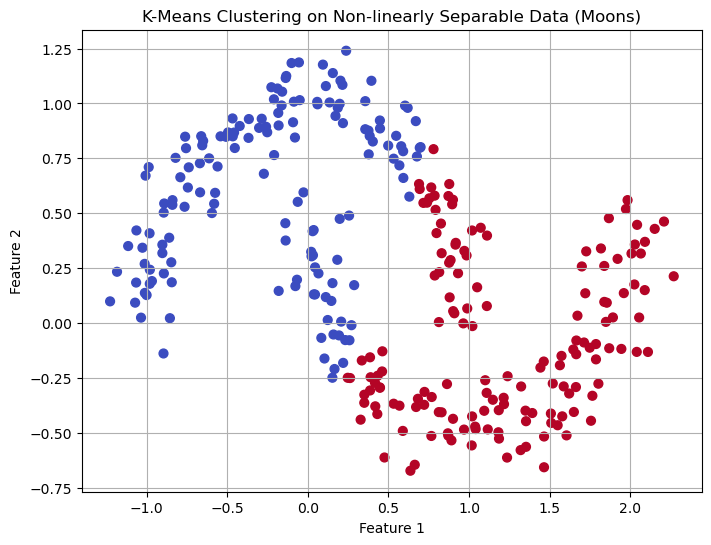

In [20]:
# 39. Generate synthetic non-linearly separable data using make_moons,
#     apply K-Means, and visualize the clustering result.

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate non-linear moon-shaped data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=40)
plt.title("K-Means Clustering on Non-linearly Separable Data (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


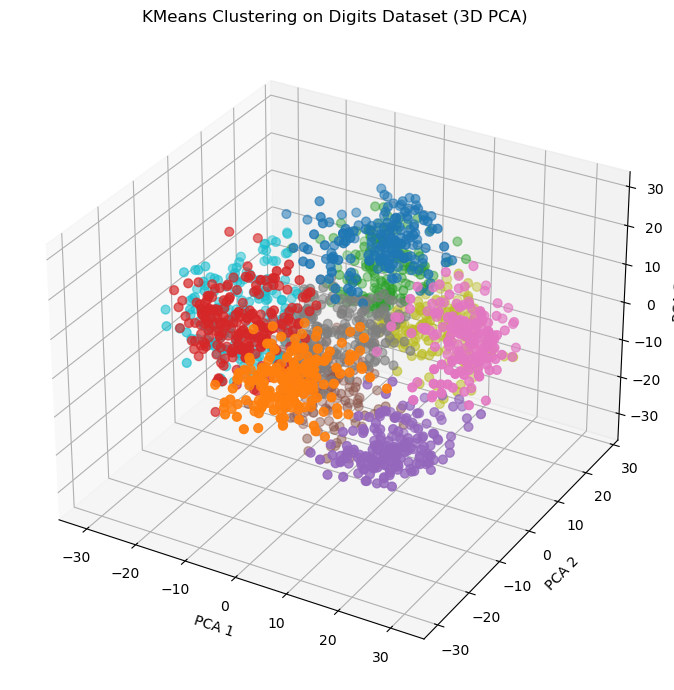

In [21]:
# 40. Load the Digits dataset, apply PCA to reduce to 3 components,
#     then use KMeans and visualize with a 3D scatter plot.

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 3 dimensions using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply KMeans clustering (assume 10 clusters for 10 digits)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='tab10', s=40)

# Axis labels and plot styling
ax.set_title("KMeans Clustering on Digits Dataset (3D PCA)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.tight_layout()
plt.show()


In [22]:
# 41. Generate synthetic blobs with 5 centers and apply KMeans.
#     Then use silhouette_score to evaluate the clustering.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data with 5 centers
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.7, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Evaluate using silhouette score
score = silhouette_score(X, labels)

# Output the result
print(f"Silhouette Score for KMeans clustering with 5 clusters: {score:.4f}")


Silhouette Score for KMeans clustering with 5 clusters: 0.7657


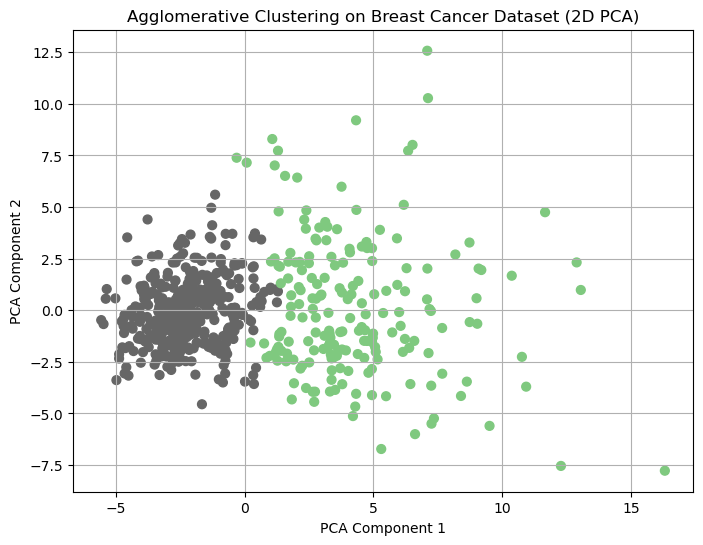

In [23]:
# 42. Load the Breast Cancer dataset, reduce dimensionality using PCA,
#     and apply Agglomerative Clustering. Visualize in 2D.

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agglo.fit_predict(X_pca)

# Visualize the clustering result in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Accent', s=40)
plt.title("Agglomerative Clustering on Breast Cancer Dataset (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


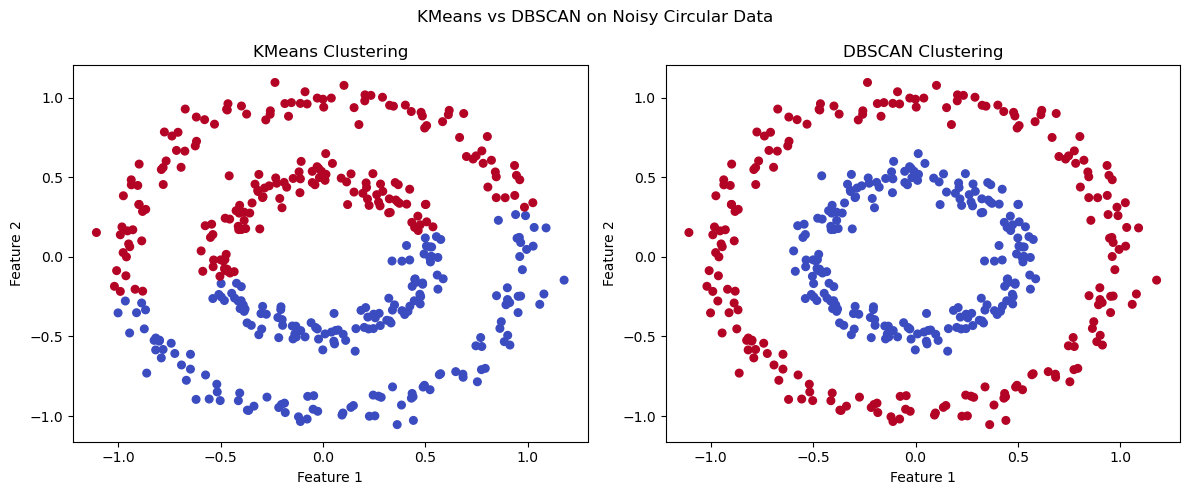

In [24]:
# 43. Generate noisy circular data using make_circles
#     and visualize clustering results from KMeans and DBSCAN side-by-side.

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Generate noisy circular data
X, _ = make_circles(n_samples=400, factor=0.5, noise=0.06, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Create side-by-side plots
plt.figure(figsize=(12, 5))

# KMeans plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='coolwarm', s=30)
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# DBSCAN plot
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='coolwarm', s=30)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.suptitle("KMeans vs DBSCAN on Noisy Circular Data")
plt.tight_layout()
plt.show()


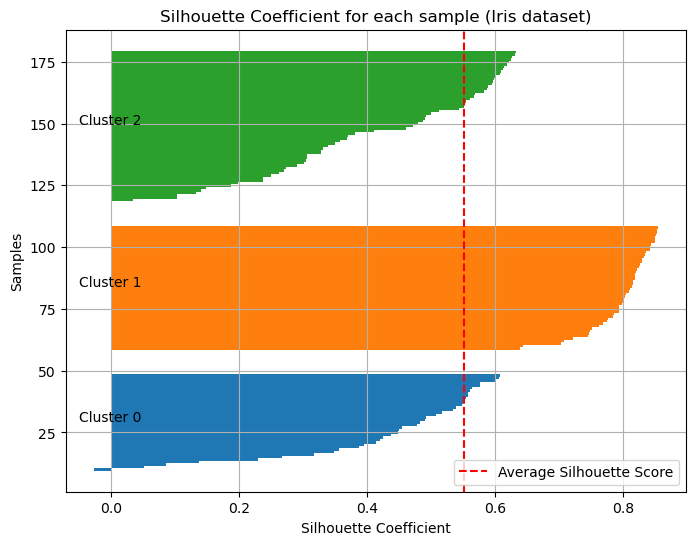

In [25]:
# 44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(X, labels)

# Plot silhouette coefficients
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(3):
    ith_cluster_vals = silhouette_vals[labels == i]
    ith_cluster_vals.sort()
    size_cluster_i = ith_cluster_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.barh(range(y_lower, y_upper), ith_cluster_vals, height=1.0)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    y_lower = y_upper + 10

plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Coefficient for each sample (Iris dataset)")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Samples")
plt.legend()
plt.grid(True)
plt.show()


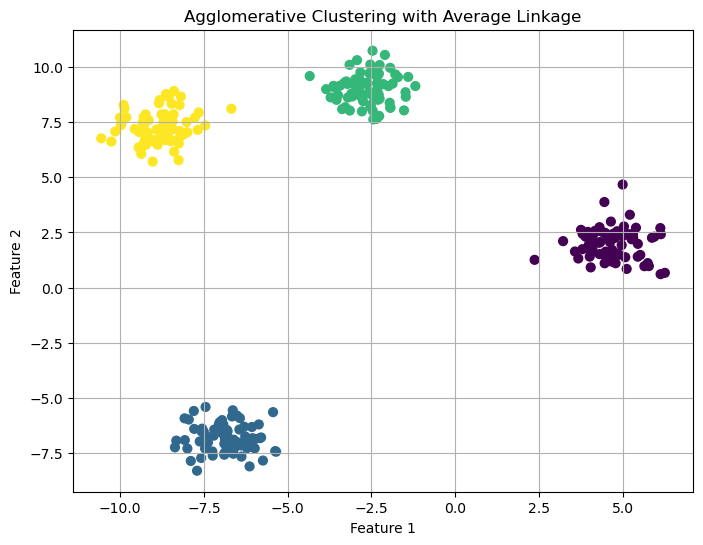

In [26]:
# 45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
#     Visualize the resulting clusters.

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# Apply Agglomerative Clustering with average linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
plt.title("Agglomerative Clustering with Average Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


/Users/saurabhkumar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


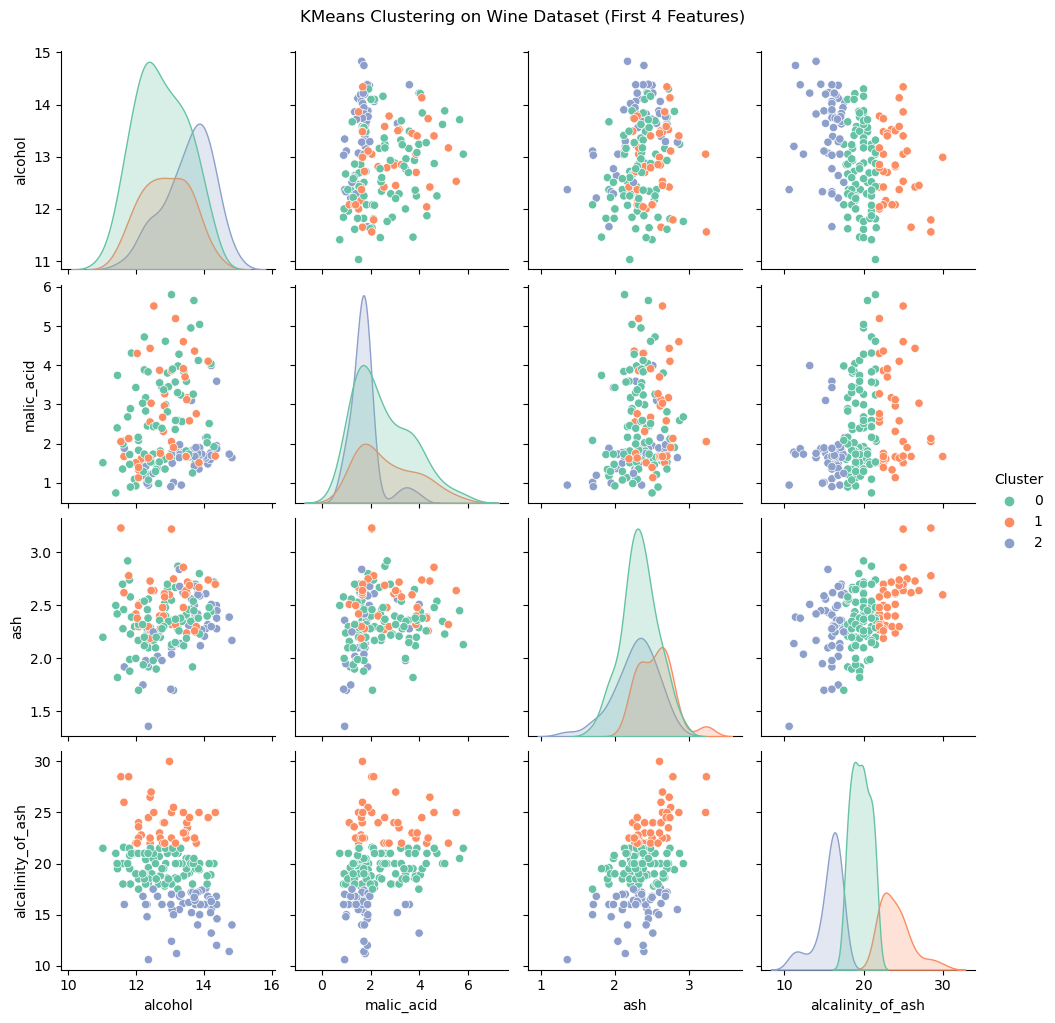

In [27]:
# 46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Wine dataset
data = load_wine()
X = data.data[:, :4]  # Use only the first 4 features
feature_names = data.feature_names[:4]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Create a DataFrame for visualization
df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = labels

# Visualize using seaborn pairplot
sns.pairplot(df, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


In [28]:
# 47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate noisy blob data
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.2, random_state=42)

# Standardize the data (important for DBSCAN)
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)

# Count number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Count noise points
n_noise = np.sum(labels == -1)

# Output counts
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters found: 3
Number of noise points: 0


/Users/saurabhkumar/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


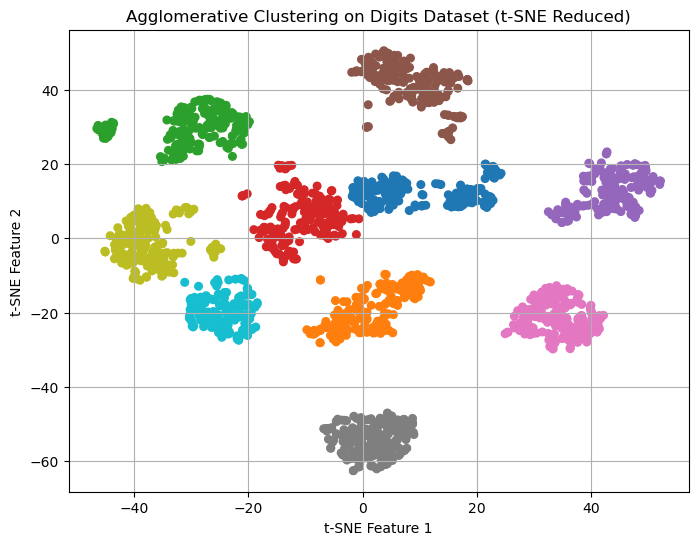

In [29]:
# 48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agglo.fit_predict(X_tsne)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=30)
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.grid(True)
plt.show()
